<a href="https://colab.research.google.com/github/Tossyn12/Computer-Aided-Drug-Discovery-repo/blob/main/LRRK2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***VIRTUAL SCREENING FOR BIOACTIVE COMPOUNDS AGAINST LRRK2***

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv("/content/sample_data/LRRK223.csv")



In [ ]:
df


,ChEMBL_ID,molecular_weight,AlogP,smiles,standard_type,standard_value,standard_units,pChEMBL_value
0,CHEMBL3971067,378.48,3.00,CC(C)n1cc(-c2cc(-c3ccc(CN4CCOCC4)cc3)cnc2N)nn1,IC50,2100.000,nM,5.68
1,CHEMBL2204495,399.43,5.11,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1,IC50,10.000,nM,8.00
2,CHEMBL4592565,443.55,3.84,CN1CC2(CCN(c3ccc(OCc4ccccc4)c(C(=O)Nc4ccnnc4)c...,IC50,63.100,nM,7.20
3,CHEMBL4560969,414.36,5.55,N#Cc1cccc(NC(=O)c2cc(C(F)(F)F)ccc2OCc2ccc(F)cc...,IC50,7.943,nM,8.10
4,CHEMBL3651817,232.29,1.86,Cc1[nH]nc2ccnc(NC3CCOCC3)c12,IC50,190.000,nM,6.72
...,...,...,...,...,...,...,...,...
2065,CHEMBL3935418,490.59,3.31,O=S(=O)(c1ccc(-c2ccc3[nH]nc(-c4cc(N5CCOCC5)ncn...,IC50,914.400,nM,6.04
2066,CHEMBL4542888,233.27,1.82,Cc1n[nH]c2ccnc(OC3CCOCC3)c12,IC50,301.000,nM,6.52
2067,CHEMBL4777342,418.79,3.64,Cn1cc(NC(=O)c2cnn3cccnc23)c(-c2cc(Cl)ccc2OC(F)...,IC50,81.000,nM,7.09
2068,CHEMBL4439241,354.84,4.43,CCc1nc2cnc3ccc(Cl)cc3c2n1[C@H]1CCO[C@@H](CC#N)C1,IC50,NaN,NaN,NaN


In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ChEMBL_ID,molecular_weight,AlogP,smiles,standard_type,standard_value,standard_units,pChEMBL_value
0,CHEMBL3971067,378.48,3.00,CC(C)n1cc(-c2cc(-c3ccc(CN4CCOCC4)cc3)cnc2N)nn1,IC50,2100.000,nM,5.68
1,CHEMBL2204495,399.43,5.11,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1,IC50,10.000,nM,8.00
2,CHEMBL4592565,443.55,3.84,CN1CC2(CCN(c3ccc(OCc4ccccc4)c(C(=O)Nc4ccnnc4)c...,IC50,63.100,nM,7.20
3,CHEMBL4560969,414.36,5.55,N#Cc1cccc(NC(=O)c2cc(C(F)(F)F)ccc2OCc2ccc(F)cc...,IC50,7.943,nM,8.10
4,CHEMBL3651817,232.29,1.86,Cc1[nH]nc2ccnc(NC3CCOCC3)c12,IC50,190.000,nM,6.72
...,...,...,...,...,...,...,...,...
2064,CHEMBL3914466,420.47,3.29,COC[C@H](C)Oc1ccc2[nH]nc(-c3cc(N4CCc5oc(C)nc5C...,IC50,8.400,nM,8.08
2065,CHEMBL3935418,490.59,3.31,O=S(=O)(c1ccc(-c2ccc3[nH]nc(-c4cc(N5CCOCC5)ncn...,IC50,914.400,nM,6.04
2066,CHEMBL4542888,233.27,1.82,Cc1n[nH]c2ccnc(OC3CCOCC3)c12,IC50,301.000,nM,6.52
2067,CHEMBL4777342,418.79,3.64,Cn1cc(NC(=O)c2cnn3cccnc23)c(-c2cc(Cl)ccc2OC(F)...,IC50,81.000,nM,7.09


In [ ]:
len(df2.smiles.unique())

1244

In [ ]:
df2_nr = df2.drop_duplicates(['smiles'])
df2_nr

,ChEMBL_ID,molecular_weight,AlogP,smiles,standard_type,standard_value,standard_units,pChEMBL_value
0,CHEMBL3971067,378.48,3.00,CC(C)n1cc(-c2cc(-c3ccc(CN4CCOCC4)cc3)cnc2N)nn1,IC50,2100.000,nM,5.68
1,CHEMBL2204495,399.43,5.11,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1,IC50,10.000,nM,8.00
2,CHEMBL4592565,443.55,3.84,CN1CC2(CCN(c3ccc(OCc4ccccc4)c(C(=O)Nc4ccnnc4)c...,IC50,63.100,nM,7.20
3,CHEMBL4560969,414.36,5.55,N#Cc1cccc(NC(=O)c2cc(C(F)(F)F)ccc2OCc2ccc(F)cc...,IC50,7.943,nM,8.10
4,CHEMBL3651817,232.29,1.86,Cc1[nH]nc2ccnc(NC3CCOCC3)c12,IC50,190.000,nM,6.72
...,...,...,...,...,...,...,...,...
2064,CHEMBL3914466,420.47,3.29,COC[C@H](C)Oc1ccc2[nH]nc(-c3cc(N4CCc5oc(C)nc5C...,IC50,8.400,nM,8.08
2065,CHEMBL3935418,490.59,3.31,O=S(=O)(c1ccc(-c2ccc3[nH]nc(-c4cc(N5CCOCC5)ncn...,IC50,914.400,nM,6.04
2066,CHEMBL4542888,233.27,1.82,Cc1n[nH]c2ccnc(OC3CCOCC3)c12,IC50,301.000,nM,6.52
2067,CHEMBL4777342,418.79,3.64,Cn1cc(NC(=O)c2cnn3cccnc23)c(-c2cc(Cl)ccc2OC(F)...,IC50,81.000,nM,7.09


In [ ]:
selection = ['ChEMBL_ID','smiles','standard_value']
df3 = df2_nr[selection]
df3

,ChEMBL_ID,smiles,standard_value
0,CHEMBL3971067,CC(C)n1cc(-c2cc(-c3ccc(CN4CCOCC4)cc3)cnc2N)nn1,2100.000
1,CHEMBL2204495,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1,10.000
2,CHEMBL4592565,CN1CC2(CCN(c3ccc(OCc4ccccc4)c(C(=O)Nc4ccnnc4)c...,63.100
3,CHEMBL4560969,N#Cc1cccc(NC(=O)c2cc(C(F)(F)F)ccc2OCc2ccc(F)cc...,7.943
4,CHEMBL3651817,Cc1[nH]nc2ccnc(NC3CCOCC3)c12,190.000
...,...,...,...
2064,CHEMBL3914466,COC[C@H](C)Oc1ccc2[nH]nc(-c3cc(N4CCc5oc(C)nc5C...,8.400
2065,CHEMBL3935418,O=S(=O)(c1ccc(-c2ccc3[nH]nc(-c4cc(N5CCOCC5)ncn...,914.400
2066,CHEMBL4542888,Cc1n[nH]c2ccnc(OC3CCOCC3)c12,301.000
2067,CHEMBL4777342,Cn1cc(NC(=O)c2cnn3cccnc23)c(-c2cc(Cl)ccc2OC(F)...,81.000


In [ ]:
df3.to_csv('LRRK2_02_bioactivity_data_preprocessed.csv', index=False)

In [ ]:
df4 = pd.read_csv('/content/LRRK2_02_bioactivity_data_preprocessed.csv')


In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,ChEMBL_ID,smiles,standard_value,class
0,CHEMBL3971067,CC(C)n1cc(-c2cc(-c3ccc(CN4CCOCC4)cc3)cnc2N)nn1,2100.000,intermediate
1,CHEMBL2204495,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1,10.000,active
2,CHEMBL4592565,CN1CC2(CCN(c3ccc(OCc4ccccc4)c(C(=O)Nc4ccnnc4)c...,63.100,active
3,CHEMBL4560969,N#Cc1cccc(NC(=O)c2cc(C(F)(F)F)ccc2OCc2ccc(F)cc...,7.943,active
4,CHEMBL3651817,Cc1[nH]nc2ccnc(NC3CCOCC3)c12,190.000,active
...,...,...,...,...
1239,CHEMBL3914466,COC[C@H](C)Oc1ccc2[nH]nc(-c3cc(N4CCc5oc(C)nc5C...,8.400,active
1240,CHEMBL3935418,O=S(=O)(c1ccc(-c2ccc3[nH]nc(-c4cc(N5CCOCC5)ncn...,914.400,active
1241,CHEMBL4542888,Cc1n[nH]c2ccnc(OC3CCOCC3)c12,301.000,active
1242,CHEMBL4777342,Cn1cc(NC(=O)c2cnn3cccnc23)c(-c2cc(Cl)ccc2OC(F)...,81.000,active


In [ ]:
df5.to_csv('LRRK2_03_bioactivity_data_curated.csv', index=False)

In [ ]:
! zip LRRK2.zip *.csv

  adding: LRRK2_02_bioactivity_data_preprocessed.csv (deflated 78%)
  adding: LRRK2_03_bioactivity_data_curated.csv (deflated 79%)


In [ ]:
! ls -l

total 224
-rw-r--r-- 1 root root 84872 Aug  9 14:36 LRRK2_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root 94324 Aug  9 14:44 LRRK2_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root 38729 Aug  9 14:45 LRRK2.zip
drwxr-xr-x 1 root root  4096 Aug  9 14:05 sample_data


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-08-09 14:56:26--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  82.1MB/s    in 1.0s    

2022-08-09 14:56:27 (82.1 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37

In [ ]:
! wget /content/LRRK2_03_bioactivity_data_curated.csv

/content/LRRK2_03_bioactivity_data_curated.csv: Scheme missing.


In [ ]:
df5

,ChEMBL_ID,smiles,standard_value,class
0,CHEMBL3971067,CC(C)n1cc(-c2cc(-c3ccc(CN4CCOCC4)cc3)cnc2N)nn1,2100.000,intermediate
1,CHEMBL2204495,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1,10.000,active
2,CHEMBL4592565,CN1CC2(CCN(c3ccc(OCc4ccccc4)c(C(=O)Nc4ccnnc4)c...,63.100,active
3,CHEMBL4560969,N#Cc1cccc(NC(=O)c2cc(C(F)(F)F)ccc2OCc2ccc(F)cc...,7.943,active
4,CHEMBL3651817,Cc1[nH]nc2ccnc(NC3CCOCC3)c12,190.000,active
...,...,...,...,...
1239,CHEMBL3914466,COC[C@H](C)Oc1ccc2[nH]nc(-c3cc(N4CCc5oc(C)nc5C...,8.400,active
1240,CHEMBL3935418,O=S(=O)(c1ccc(-c2ccc3[nH]nc(-c4cc(N5CCOCC5)ncn...,914.400,active
1241,CHEMBL4542888,Cc1n[nH]c2ccnc(OC3CCOCC3)c12,301.000,active
1242,CHEMBL4777342,Cn1cc(NC(=O)c2cnn3cccnc23)c(-c2cc(Cl)ccc2OC(F)...,81.000,active


In [ ]:
df_no_smiles = df5.drop(columns='smiles')

In [ ]:
smiles = []

for i in df5.smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,ChEMBL_ID,standard_value,class,smiles
0,CHEMBL3971067,2100.000,intermediate,CC(C)n1cc(-c2cc(-c3ccc(CN4CCOCC4)cc3)cnc2N)nn1
1,CHEMBL2204495,10.000,active,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1
2,CHEMBL4592565,63.100,active,CN1CC2(CCN(c3ccc(OCc4ccccc4)c(C(=O)Nc4ccnnc4)c...
3,CHEMBL4560969,7.943,active,N#Cc1cccc(NC(=O)c2cc(C(F)(F)F)ccc2OCc2ccc(F)cc...
4,CHEMBL3651817,190.000,active,Cc1[nH]nc2ccnc(NC3CCOCC3)c12
...,...,...,...,...
1239,CHEMBL3914466,8.400,active,COC[C@H](C)Oc1ccc2[nH]nc(-c3cc(N4CCc5oc(C)nc5C...
1240,CHEMBL3935418,914.400,active,O=S(=O)(c1ccc(-c2ccc3[nH]nc(-c4cc(N5CCOCC5)ncn...
1241,CHEMBL4542888,301.000,active,Cc1n[nH]c2ccnc(OC3CCOCC3)c12
1242,CHEMBL4777342,81.000,active,Cn1cc(NC(=O)c2cnn3cccnc23)c(-c2cc(Cl)ccc2OC(F)...


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,378.480,3.00240,1.0,7.0
1,399.425,5.11400,1.0,4.0
2,443.551,3.83990,1.0,6.0
3,414.358,5.54748,1.0,3.0
4,232.287,1.85722,2.0,4.0
...,...,...,...,...
1239,420.473,3.29272,1.0,8.0
1240,490.589,3.30800,1.0,7.0
1241,233.271,1.82412,1.0,4.0
1242,418.791,3.63690,1.0,7.0


In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,378.480,3.00240,1.0,7.0
1,399.425,5.11400,1.0,4.0
2,443.551,3.83990,1.0,6.0
3,414.358,5.54748,1.0,3.0
4,232.287,1.85722,2.0,4.0
...,...,...,...,...
1239,420.473,3.29272,1.0,8.0
1240,490.589,3.30800,1.0,7.0
1241,233.271,1.82412,1.0,4.0
1242,418.791,3.63690,1.0,7.0


In [ ]:
df_combined = pd.concat([df5,df_lipinski], axis=1)
df_combined

,ChEMBL_ID,smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3971067,CC(C)n1cc(-c2cc(-c3ccc(CN4CCOCC4)cc3)cnc2N)nn1,2100.000,intermediate,378.480,3.00240,1.0,7.0
1,CHEMBL2204495,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1,10.000,active,399.425,5.11400,1.0,4.0
2,CHEMBL4592565,CN1CC2(CCN(c3ccc(OCc4ccccc4)c(C(=O)Nc4ccnnc4)c...,63.100,active,443.551,3.83990,1.0,6.0
3,CHEMBL4560969,N#Cc1cccc(NC(=O)c2cc(C(F)(F)F)ccc2OCc2ccc(F)cc...,7.943,active,414.358,5.54748,1.0,3.0
4,CHEMBL3651817,Cc1[nH]nc2ccnc(NC3CCOCC3)c12,190.000,active,232.287,1.85722,2.0,4.0
...,...,...,...,...,...,...,...,...
1239,CHEMBL3914466,COC[C@H](C)Oc1ccc2[nH]nc(-c3cc(N4CCc5oc(C)nc5C...,8.400,active,420.473,3.29272,1.0,8.0
1240,CHEMBL3935418,O=S(=O)(c1ccc(-c2ccc3[nH]nc(-c4cc(N5CCOCC5)ncn...,914.400,active,490.589,3.30800,1.0,7.0
1241,CHEMBL4542888,Cc1n[nH]c2ccnc(OC3CCOCC3)c12,301.000,active,233.271,1.82412,1.0,4.0
1242,CHEMBL4777342,Cn1cc(NC(=O)c2cnn3cccnc23)c(-c2cc(Cl)ccc2OC(F)...,81.000,active,418.791,3.63690,1.0,7.0


In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_combined.standard_value.describe()

count      1244.000000
mean       1385.290191
std        7311.495883
min           0.001000
25%          11.650000
50%          46.000000
75%         260.250000
max      100000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,ChEMBL_ID,smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL3971067,CC(C)n1cc(-c2cc(-c3ccc(CN4CCOCC4)cc3)cnc2N)nn1,intermediate,378.480,3.00240,1.0,7.0,2100.000
1,CHEMBL2204495,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1,active,399.425,5.11400,1.0,4.0,10.000
2,CHEMBL4592565,CN1CC2(CCN(c3ccc(OCc4ccccc4)c(C(=O)Nc4ccnnc4)c...,active,443.551,3.83990,1.0,6.0,63.100
3,CHEMBL4560969,N#Cc1cccc(NC(=O)c2cc(C(F)(F)F)ccc2OCc2ccc(F)cc...,active,414.358,5.54748,1.0,3.0,7.943
4,CHEMBL3651817,Cc1[nH]nc2ccnc(NC3CCOCC3)c12,active,232.287,1.85722,2.0,4.0,190.000
...,...,...,...,...,...,...,...,...
1239,CHEMBL3914466,COC[C@H](C)Oc1ccc2[nH]nc(-c3cc(N4CCc5oc(C)nc5C...,active,420.473,3.29272,1.0,8.0,8.400
1240,CHEMBL3935418,O=S(=O)(c1ccc(-c2ccc3[nH]nc(-c4cc(N5CCOCC5)ncn...,active,490.589,3.30800,1.0,7.0,914.400
1241,CHEMBL4542888,Cc1n[nH]c2ccnc(OC3CCOCC3)c12,active,233.271,1.82412,1.0,4.0,301.000
1242,CHEMBL4777342,Cn1cc(NC(=O)c2cnn3cccnc23)c(-c2cc(Cl)ccc2OC(F)...,active,418.791,3.63690,1.0,7.0,81.000


In [ ]:
df_norm.standard_value_norm.describe()

count      1244.000000
mean       1385.290191
std        7311.495883
min           0.001000
25%          11.650000
50%          46.000000
75%         260.250000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,ChEMBL_ID,smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3971067,CC(C)n1cc(-c2cc(-c3ccc(CN4CCOCC4)cc3)cnc2N)nn1,intermediate,378.480,3.00240,1.0,7.0,5.677781
1,CHEMBL2204495,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1,active,399.425,5.11400,1.0,4.0,8.000000
2,CHEMBL4592565,CN1CC2(CCN(c3ccc(OCc4ccccc4)c(C(=O)Nc4ccnnc4)c...,active,443.551,3.83990,1.0,6.0,7.199971
3,CHEMBL4560969,N#Cc1cccc(NC(=O)c2cc(C(F)(F)F)ccc2OCc2ccc(F)cc...,active,414.358,5.54748,1.0,3.0,8.100015
4,CHEMBL3651817,Cc1[nH]nc2ccnc(NC3CCOCC3)c12,active,232.287,1.85722,2.0,4.0,6.721246
...,...,...,...,...,...,...,...,...
1239,CHEMBL3914466,COC[C@H](C)Oc1ccc2[nH]nc(-c3cc(N4CCc5oc(C)nc5C...,active,420.473,3.29272,1.0,8.0,8.075721
1240,CHEMBL3935418,O=S(=O)(c1ccc(-c2ccc3[nH]nc(-c4cc(N5CCOCC5)ncn...,active,490.589,3.30800,1.0,7.0,6.038864
1241,CHEMBL4542888,Cc1n[nH]c2ccnc(OC3CCOCC3)c12,active,233.271,1.82412,1.0,4.0,6.521434
1242,CHEMBL4777342,Cn1cc(NC(=O)c2cnn3cccnc23)c(-c2cc(Cl)ccc2OC(F)...,active,418.791,3.63690,1.0,7.0,7.091515


In [ ]:
df_final.pIC50.describe()


count    1244.000000
mean        7.203829
std         1.013097
min         4.000000
25%         6.584610
50%         7.337242
75%         7.933686
max        12.000000
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('LRRK2_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,ChEMBL_ID,smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2204495,O=C(Nc1cccnc1)c1cc(-c2ccnc(F)c2)ccc1OCc1ccccc1,active,399.425,5.11400,1.0,4.0,8.000000
2,CHEMBL4592565,CN1CC2(CCN(c3ccc(OCc4ccccc4)c(C(=O)Nc4ccnnc4)c...,active,443.551,3.83990,1.0,6.0,7.199971
3,CHEMBL4560969,N#Cc1cccc(NC(=O)c2cc(C(F)(F)F)ccc2OCc2ccc(F)cc...,active,414.358,5.54748,1.0,3.0,8.100015
4,CHEMBL3651817,Cc1[nH]nc2ccnc(NC3CCOCC3)c12,active,232.287,1.85722,2.0,4.0,6.721246
5,CHEMBL4524629,Cc1n[nH]c2ccnc(OC3CCCCC3)c12,active,231.299,2.97782,1.0,3.0,7.173925
...,...,...,...,...,...,...,...,...
1239,CHEMBL3914466,COC[C@H](C)Oc1ccc2[nH]nc(-c3cc(N4CCc5oc(C)nc5C...,active,420.473,3.29272,1.0,8.0,8.075721
1240,CHEMBL3935418,O=S(=O)(c1ccc(-c2ccc3[nH]nc(-c4cc(N5CCOCC5)ncn...,active,490.589,3.30800,1.0,7.0,6.038864
1241,CHEMBL4542888,Cc1n[nH]c2ccnc(OC3CCOCC3)c12,active,233.271,1.82412,1.0,4.0,6.521434
1242,CHEMBL4777342,Cn1cc(NC(=O)c2cnn3cccnc23)c(-c2cc(Cl)ccc2OC(F)...,active,418.791,3.63690,1.0,7.0,7.091515


In [ ]:
df_2class.to_csv('LRRK2_05_bioactivity_data_2class_pIC50.csv')

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

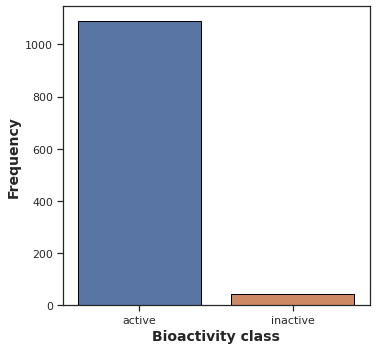

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

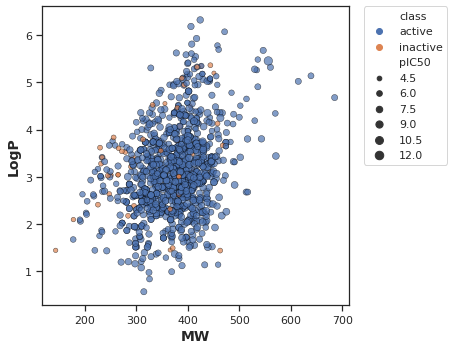

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

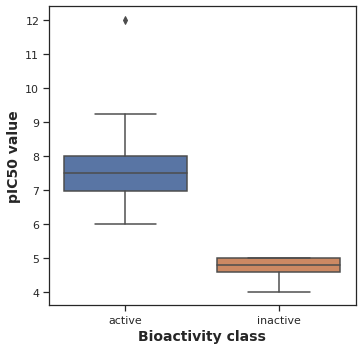

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,49095.0,5.176766e-30,0.05,Different distribution (reject H0)


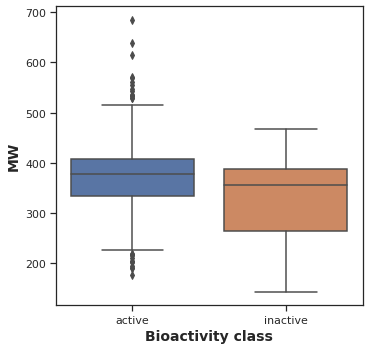

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,31270.0,0.001829,0.05,Different distribution (reject H0)


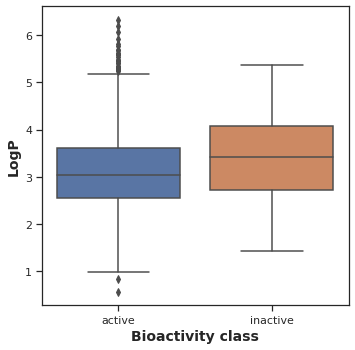

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,20002.0,0.035092,0.05,Different distribution (reject H0)


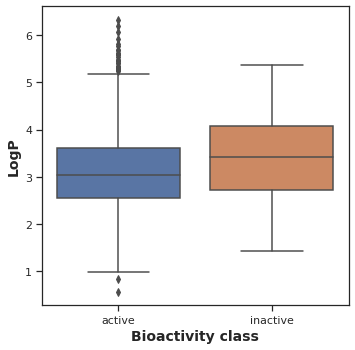

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

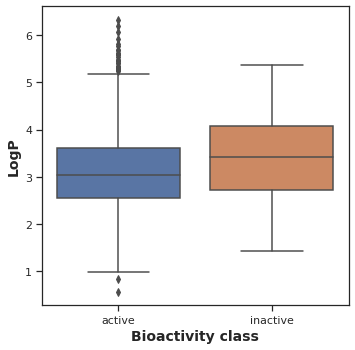

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,28181.0,0.052799,0.05,Same distribution (fail to reject H0)


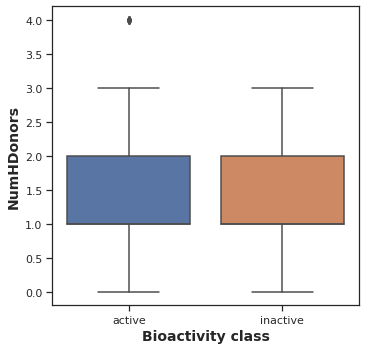

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

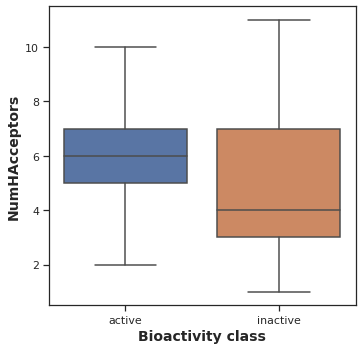

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,31863.5,0.000543,0.05,Different distribution (reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: LRRK2_04_bioactivity_data_3class_pIC50.csv (deflated 74%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: LRRK2_05_bioactivity_data_2class_pIC50.csv (deflated 74%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
  adding: LRRK2_03_bioactivity_data_curated.csv (deflated 79%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: LRRK2_02_bioactivity_data_preprocessed.csv (deflated 78%)


##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.